# M2 | Exploration Notebook

In this notebook, you will do a first exploration of the data set that you will use for your project. One part of this exploration is guided, i.e. we will ask you to solve specific questions (task 1-3). The other part is open, i.e. we will ask you to come up with your own exploration ideas (task 4). 

Please upload your solved notebook to Moodle (under Milestone 2 Submission)adding your SCIPER number in title, example: m2-lernnavi-456392.ipynb


## Brief overview of Lernnavi
[Lernnavi](https://www.lernnavi.ch) is an instrument for promoting part of the basic technical study skills in German and mathematics.


For the guided part of the exploration we will focus on the three main tables:
* *users*: demographic information of users.
* *events*: events done by the users in the platform.
* *transactions*: question and answer solved by user.

### Users
* user_id: unique identifier of user in database.
* gender: only three values: M male, F female or missing. 
* canton: swiss canton.
* class_level: school year in swiss system.


### Events
* event_id: unique identifier of event in database.
* user_id: user who peformed the event.
* timestamp: timestamp of event.
* category: classification of action (task, general, statistics, etc).
* action: type of action performed.
* event_type: whether the students viewed or clicked in the event.
* transaction_token: used to link to transactions table.
* session_id: session during which the event took place.
* tracking_data: optional content associated to this event (e.g., the new points mastered for a topic).


### Transactions
* transaction_id: unique identifier of transaction in database.
* transaction_token: used to link to events table.
* user_id: user who performed the transaction.
* document_id: document that was answered in transaction.
* document_version: version of document that was answered.
* evaluation: whether the user answered correctly or not. It is possible that it was only partially right. 
* input: answer the user gave.
* start_time: timestamp of when the user started answering.
* commit_time: timestamp of when the user submitted the answer.
* user_agent: the browser that the user used.
* validation: used to validate the format of the input.
* solution: solution to question.
* type: type of question that was answered. 


In [1]:
# Import the tables of the data set as dataframes.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
DATA_DIR = './data' #You many change the directory

users = pd.read_csv('{}/users.csv.gz'.format(DATA_DIR))
events = pd.read_csv('{}/events.csv.gz'.format(DATA_DIR))
transactions = pd.read_csv('{}/transactions.csv.gz'.format(DATA_DIR))

In [3]:
display(users)

,user_id,gender,canton,class_level
0,387604,NaN,NaN,NaN
1,387605,NaN,NaN,NaN
2,387608,NaN,NaN,NaN
3,387615,MALE,SG,Gymnasium - 3. Jahr
4,387643,NaN,NaN,NaN
...,...,...,...,...
13690,404600,NaN,NaN,NaN
13691,404603,FEMALE,SO,Gymnasium - 4. Jahr
13692,404604,FEMALE,ZH,Langzeitgymnasium - 2. Jahr
13693,404605,FEMALE,SO,Gymnasium - 3. Jahr


In [4]:
display(events)

,event_id,user_id,timestamp,category,action,event_type,transaction_token,session_id,tracking_data
0,62,393211,1621583814885,TASK,VIEW_QUESTION,VIEW,7a10ca52-ffb5-4069-8800-0dc86d778e94,NaN,NaN
1,63,393211,1621583898912,TASK,SUBMIT_ANSWER,CLICK,7a10ca52-ffb5-4069-8800-0dc86d778e94,NaN,NaN
2,64,393211,1621583907207,TASK,NEXT,CLICK,7a10ca52-ffb5-4069-8800-0dc86d778e94,NaN,NaN
3,65,393211,1621583907589,TASK,VIEW_QUESTION,VIEW,88fdcaad-f73b-46a2-b561-d262f2441442,NaN,NaN
4,66,393211,1621584222588,TASK,SUBMIT_ANSWER,CLICK,88fdcaad-f73b-46a2-b561-d262f2441442,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3465554,3518462,404560,1645519933345,TASK,SUBMIT_ANSWER,CLICK,9edfed2d-ebe8-4b0e-873c-9ba13e6541b3,112259.0,NaN
3465555,3518463,404560,1645519934803,TASK,NEXT,CLICK,9edfed2d-ebe8-4b0e-873c-9ba13e6541b3,112259.0,NaN
3465556,3518464,404560,1645519935451,SESSION,REVIEW_TASK,VIEW,133248bc-5771-4240-94c2-77b23b7c2d97,112259.0,NaN
3465557,3518465,404552,1645519936842,USER_SESSION,WINDOW_VISIBLE_TRUE,VIEW,NaN,NaN,"{""location"": ""https://app.lernnavi.ch/session/..."


In [5]:
display(transactions)

,transaction_id,transaction_token,user_id,document_id,document_version,evaluation,input,start_time,commit_time,user_agent,validation,solution,type
0,1061991,cf99b0d7-279a-4ae0-8ef3-a15514e350b6,387604.0,111K3PY6sbr8ac1mRGpse1,87668,NaN,NaN,1637146446763,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN,NaN,NaN
1,1066631,13e3086b-1c4e-4d28-87a3-0582ccf495c6,387604.0,111K3PY6sbr8ac1mRGpse1,87668,NaN,NaN,1637233737283,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN,NaN,NaN
2,1011975,6f292166-86bd-4ec9-81e8-22e9033d571e,387604.0,111K3PY6sbr8ac1mRGpse1,87668,CORRECT,"{""type"": ""MULTIPLE_CHOICE"", ""selections"": {""0""...",1636444658255,1.636445e+12,NaN,PASS,"{""type"": ""MULTIPLE_CHOICE"", ""choices"": [{""cont...",MULTIPLE_CHOICE
3,1020790,79a7d731-a36b-4529-a11b-108b9f877a04,387604.0,111K3PY6sbr8ac1mRGpse1,87668,CORRECT,"{""type"": ""MULTIPLE_CHOICE"", ""selections"": {""0""...",1636561847705,1.636562e+12,NaN,PASS,"{""type"": ""MULTIPLE_CHOICE"", ""choices"": [{""cont...",MULTIPLE_CHOICE
4,1061970,a45b6464-371e-47f4-842c-34f9e345b4ec,387604.0,111K3PY6sbr8ac1mRGpse1,87668,CORRECT,"{""type"": ""MULTIPLE_CHOICE"", ""selections"": {""0""...",1637146373965,1.637146e+12,NaN,PASS,"{""type"": ""MULTIPLE_CHOICE"", ""choices"": [{""cont...",MULTIPLE_CHOICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
800013,1585030,06d45030-3e4b-478a-ac7b-8ea1baaa72e5,404604.0,9wGXbOQkPdV6yr6aUa4ubj,89818,NaN,NaN,1645461301727,NaN,Mozilla/5.0 (Linux; Android 12; SAMSUNG SM-A72...,NaN,NaN,NaN
800014,1585034,cf5959df-cf20-459b-82f4-ebaea1c5d06b,404604.0,9wGXbOQkPdV6yr6aUa4ubj,89818,NaN,NaN,1645461326174,NaN,Mozilla/5.0 (Linux; Android 12; SAMSUNG SM-A72...,NaN,NaN,NaN
800015,1584551,7c9956b4-d2e2-4f30-9245-8155d6636bd5,404604.0,9wGXbOQkPdV6yr6aUa4ubj,89818,NaN,NaN,1645454941994,1.645455e+12,unknown,SKIP,NaN,NaN
800016,1584578,7e328437-52df-4697-94e9-186844c3e269,404604.0,a1jzfZLIHDt7LzD8KKha54,39046,PARTIAL,"{""type"": ""MULTIPLE_CHOICE"", ""selections"": {""3""...",1645455097067,1.645455e+12,unknown,PASS,"{""type"": ""MULTIPLE_CHOICE"", ""choices"": [{""cont...",MULTIPLE_CHOICE


## Task 1: Simple Statistics

In this task you are asked to do a first coarse exploration of the data set, using simple statistics and visualizations.

#### a) How many distinct participants do we have in the data set?


In [6]:
## Your code goes here
users.user_id.nunique()

13695

#### b) How many transactions were done per user? Please provide a visualization and discuss the distribution.

In [7]:
nb_transactions_per_user = transactions.user_id.value_counts(dropna=False)
nb_transactions_per_user

396334.0    1723
394780.0    1491
394913.0    1372
401331.0    1338
394677.0    1262
            ... 
394343.0       1
403858.0       1
394899.0       1
392472.0       1
389427.0       1
Name: user_id, Length: 10493, dtype: int64

<AxesSubplot:>

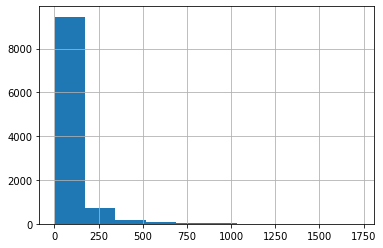

In [8]:
nb_transactions_per_user.hist()

In [9]:
np.sum(nb_transactions_per_user < 100)/transactions.user_id.nunique()

0.7890021919374821

In [10]:
np.sum(nb_transactions_per_user < 200)/transactions.user_id.nunique()

0.9199466310873916

The distribution follows a Poisson distribution since we are counting the number of transactions a user has performed from the creation of his account during 2020-2022. The majority of users have done only few transactions, almost 80% of the users have less than 100 transactions, whereas a few users have a lot of transactions (only one user has done 1723 transactions).

#### c) Which are the 10 most popular event actions? Please provide a visualization of the frequency of the top 10 event actions.

Hint: See actions in table events.

In [11]:
events.action.value_counts(dropna=False)

PAGE_VISIT              653725
REVIEW_TASK             513389
SUBMIT_ANSWER           419862
NAVIGATE_DASHBOARD      350821
NEXT                    277020
WINDOW_VISIBLE_FALSE    240660
WINDOW_VISIBLE_TRUE     199287
VIEW_QUESTION           154592
OPEN_FEEDBACK            87071
GO_TO_THEORY             80746
CLOSE_FEEDBACK           76780
SURVEY_BANNER            68644
VIEW_SESSION_END         52205
SKIP                     50114
SUBMIT_SEARCH            48953
WINDOW_OPEN              48501
CLOSE                    42276
WINDOW_CLOSE             36576
LOGIN                    23071
SELECT_STATISTICS        16897
ACCEPT_PROGRESS          11017
GO_TO_BUG_REPORT          3660
GO_TO_COMMENTS            3640
LOGOUT                    2064
PRETEST                   1709
REJECT_PROGRESS           1200
SHARE_SESSION              403
NAVIGATE_SURVEY            219
REQUEST_HINT               185
GO_TO_SESSION              182
SHARE                       90
Name: action, dtype: int64

In [12]:
# Your code goes here
event_action_count = events.action.value_counts(dropna=False).head(10)
pd.DataFrame({"Action": event_action_count.index, "Count": event_action_count.tolist(), "Count %": event_action_count.tolist()/np.array(len(events)) })

,Action,Count,Count %
0,PAGE_VISIT,653725,0.188635
1,REVIEW_TASK,513389,0.148140
2,SUBMIT_ANSWER,419862,0.121153
3,NAVIGATE_DASHBOARD,350821,0.101231
4,NEXT,277020,0.079935
5,WINDOW_VISIBLE_FALSE,240660,0.069443
6,WINDOW_VISIBLE_TRUE,199287,0.057505
7,VIEW_QUESTION,154592,0.044608
8,OPEN_FEEDBACK,87071,0.025125
9,GO_TO_THEORY,80746,0.023300


This is an expected behaviour: the most frequent events are about navigating through the website, reviewing and answering the questions. An user logs in usually once per session, but can visit multiple pages multiple times. The actions such as GO_TO_BUG_REPORT are rarer since the user will perform these actions only in unusual situations (finding a bug on the website).

## Task 2: Static Analysis

In this second task, you will do a univariate an multivariate exploration of some aggregated features.

#### a) Build a data frame containing one row per user:

``[user_id, gender, num_events, num_questions, percentage_correct, num_reading]``


The features are defined as follows:

- **num_questions**: total number of questions the student answered (hint: action event = submit answer)

- **num_events**: total number of events of the student  

- **percentage_correct**: number of correct answers/total number of answers (hint: evaluation = correct). If desired, you may assign a weight of 0.5 to partially correct answers. 

- **num_reading**: total number of theory reading events  (hint: action event = go to theory)

In [13]:
active_users = set(transactions['user_id'].unique()) & set(events['user_id'].unique())
df_active_users = pd.merge(users[['user_id', 'gender']], pd.DataFrame({'user_id': list(active_users)}), on='user_id', how='inner')
df_active_users

,user_id,gender
0,387604,NaN
1,387605,NaN
2,387608,NaN
3,387615,MALE
4,387643,NaN
...,...,...
8122,404597,NaN
8123,404598,MALE
8124,404599,NaN
8125,404603,FEMALE


In [14]:
events_count = events.user_id.value_counts(dropna=False)
df_event_count = pd.DataFrame({'user_id': events_count.index, 'num_events': events_count.tolist()})

In [15]:
# Your code for building the data frame here
res1 = pd.merge(df_active_users, df_event_count, on='user_id', how='inner')

In [16]:
questions_count = transactions[transactions['evaluation'].notna()].user_id.value_counts()
df_questions_count = pd.DataFrame({'user_id': questions_count.index, 'num_questions': questions_count.tolist()})

In [17]:
res2 = pd.merge(res1, df_questions_count, on='user_id', how='left').fillna(value={'num_questions':0})

In [18]:
correct_count = transactions.loc[transactions['evaluation'] == 'CORRECT'].user_id.value_counts(dropna=True)
partial_count = transactions.loc[transactions['evaluation'] == 'PARTIAL'].user_id.value_counts(dropna=True) * 1/2
eval_count = correct_count.add(partial_count, fill_value=0)
df_eval_count = pd.DataFrame({'user_id': eval_count.index, 'correct': eval_count.tolist()})

In [19]:
df_questions_correct = pd.merge(df_questions_count, df_eval_count, on='user_id', how='left').fillna(
    value={'correct':0})
df_questions_correct['percentage_correct'] = df_questions_correct['correct'] / df_questions_correct['num_questions']
df_questions_correct

,user_id,num_questions,correct,percentage_correct
0,396334.0,1052,753.5,0.716255
1,394780.0,974,766.0,0.786448
2,394987.0,911,602.0,0.660812
3,394761.0,910,537.5,0.590659
4,394762.0,898,626.5,0.697661
...,...,...,...,...
10212,396600.0,1,0.0,0.000000
10213,396601.0,1,0.0,0.000000
10214,396727.0,1,1.0,1.000000
10215,396744.0,1,0.5,0.500000


In [20]:
res3 = pd.merge(res2, df_questions_correct[['user_id', 'percentage_correct']], on='user_id', how='left')

In [21]:
readings_count = events.loc[events['action']=='GO_TO_THEORY'].user_id.value_counts(dropna=False)
df_readings_count = pd.DataFrame({'user_id': readings_count.index, 'num_readings': readings_count.tolist()})

In [22]:
res4 = pd.merge(res3, df_readings_count, on='user_id', how='left').fillna(value={'num_readings':0})
res4

,user_id,gender,num_events,num_questions,percentage_correct,num_readings
0,387604,NaN,2606,97.0,0.536082,368.0
1,387605,NaN,3331,510.0,0.648039,33.0
2,387608,NaN,866,151.0,0.821192,23.0
3,387615,MALE,492,111.0,0.720721,10.0
4,387643,NaN,4,11.0,0.681818,0.0
...,...,...,...,...,...,...
8122,404597,NaN,95,1.0,0.500000,8.0
8123,404598,MALE,225,1.0,1.000000,15.0
8124,404599,NaN,169,1.0,1.000000,38.0
8125,404603,FEMALE,112,13.0,0.653846,0.0


b) Perform a univariate analysis (including descriptive statistics and visualizations) for the five features (gender, num_events, num_questions, percentage_correct, num_reading) of your dataframe. Please check the lecture slides regarding information on how to perform a univariate analysis for categorical and numerical features. Discuss your results: how are the features distributed? Are there any anomalities?

In [23]:
# Gender: categorical feature
gender = res4.gender.value_counts(dropna=False)
df_gender = pd.DataFrame({"Gender": gender.index, "Count": gender.tolist(), "Count %": gender.tolist()/np.sum(gender.tolist()) })
df_gender

,Gender,Count,Count %
0,FEMALE,3989,0.490833
1,MALE,2686,0.330503
2,NaN,1090,0.134121
3,STAR,362,0.044543


[Text(0.5, 0, 'Gender'), Text(0, 0.5, 'Count')]

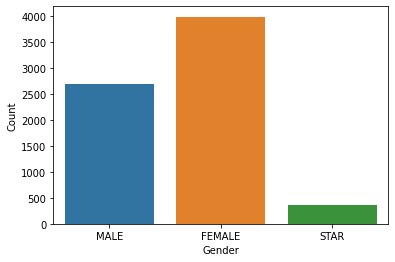

In [24]:
ax = sns.countplot(data=res4, x= 'gender')
ax.set(xlabel='Gender', ylabel='Count')

#### Analysis:
There are 16% more women than men in the dataset. 13% of the users do not provide information. 4% of the users have the value star, which is gender neutral. This can be considered as an anomaly, in the sense that it is not mentionned in the overview of the users table. Otherwise the distribution is unexpected, but not unnatural.

In [25]:
feature_list = [res4['num_events'], res4['num_questions'], res4['percentage_correct'], res4['num_readings']]
data = {'Mean': np.nanmean(feature_list,1),
        'Median':np.nanmedian(feature_list,1),
        'Mode': (stats.mode(feature_list,axis=1, nan_policy='omit')[0])[:,0],
        'Variance':np.nanvar(feature_list,1),
        'Std':np.nanstd(feature_list,1),
        'Minimum': np.nanmin(feature_list,1),
        '25%': np.nanpercentile(feature_list, 25, axis=1),
        '75%': np.nanpercentile(feature_list, 75, axis=1),
        'Maximum': np.nanmax(feature_list,1)}
desc_stats_df = pd.DataFrame(data, index =['num_events', 'num_questions', 'percentage_correct',
       'num_readings'])

display(desc_stats_df)

,Mean,Median,Mode,Variance,Std,Minimum,25%,75%,Maximum
num_events,399.224068,210.000000,59.0,392830.986461,626.762305,1.0,103.000000,432.00,10044.0
num_questions,53.424265,27.000000,5.0,7292.309725,85.395022,0.0,11.000000,60.00,1052.0
percentage_correct,0.659517,0.666667,0.5,0.022010,0.148357,0.0,0.583333,0.75,1.0
num_readings,9.751815,1.000000,0.0,1712.131957,41.377916,0.0,0.000000,7.00,2404.0


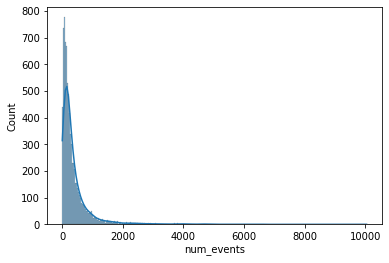

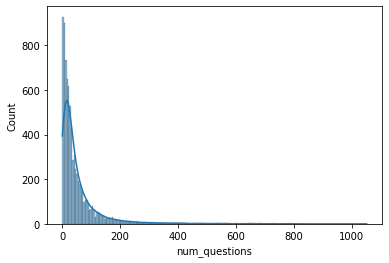

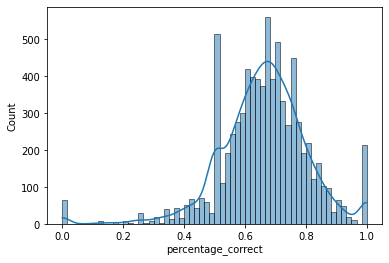

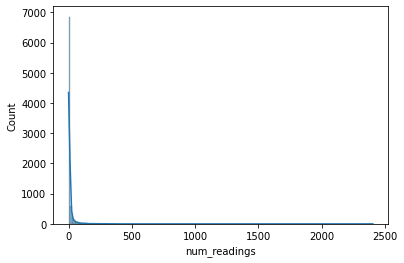

In [26]:
sns.histplot(data=res4, x = 'num_events', kde=True) 
plt.show()

sns.histplot(data=res4, x = 'num_questions', kde=True) 
plt.show()

sns.histplot(data=res4, x = 'percentage_correct', kde=True) 
plt.show()

sns.histplot(data=res4, x = 'num_readings', kde=True, bins=200) 
plt.show()

#### Data processing: 
The number of questions answered is the number of transactions for which evaluation =/= NaN, since the event table is newer than the transaction table, there are transactions that are not recorded in the event table, which would make the feature percentage_correct inconsistent: there would be more correct answers than answer submitted. 

We process the users such that users that do not appear in all three tables are removed, since we would not be able to distinguish if the user has not submitted any transaction / has not interacted with the website at all, or we just do not have access to such information, which could make analysis harder. 
Users with no question answered are kept, they appear in all three tables so we know that they have at least viewed a question, but did not answer. Their percentage_correct value is NaN, but we ignore those values when computing the distribution of that feature. Users with 0 readings have interacted with the website but have not navigated to a course theory page.

#### Analysis: 
The features num_events, num_questions and num_readings follow a Poisson distribution, since we count the number of times they performed such action in a timeframe. They have mean values that are higher than their median and have very high variance. There are outliers with very high values, for example there are users with more than 1000 questions answered, but the majority of users have low values. This is expected as students may read and answers questions from a few courses that they need practice in, but may not need to do so for every course. \
The feature percentage_correct follows a Binomial distribution, we count the number of successes in a number of tests. The distribution is a bit left skewed. This is expected for student performance.

c) Come up with two additional features on your own and add them to the dataframe. Please provide an explanation/description of your features as well as an argument/hypothesis of why you think these features are interesting to explore.

In [27]:
# Your code for computing the features and adding them to the df goes here
# average time of answer, request hint: does a user usually 
feedback_count = events.loc[events['action'] == 'OPEN_FEEDBACK'].user_id.value_counts()
df_feedback_count = pd.DataFrame({'user_id': feedback_count.index, 'num_feedback_opened': feedback_count.tolist()})
df_feedback_count

,user_id,num_feedback_opened
0,394677,412
1,400292,385
2,394675,382
3,396334,362
4,394987,315
...,...,...
4198,395700,1
4199,401081,1
4200,401079,1
4201,401082,1


In [28]:
res5 = pd.merge(res4, df_feedback_count, on='user_id', how='left').fillna(value={'num_feedback_opened':0})
res5

,user_id,gender,num_events,num_questions,percentage_correct,num_readings,num_feedback_opened
0,387604,NaN,2606,97.0,0.536082,368.0,0.0
1,387605,NaN,3331,510.0,0.648039,33.0,70.0
2,387608,NaN,866,151.0,0.821192,23.0,3.0
3,387615,MALE,492,111.0,0.720721,10.0,1.0
4,387643,NaN,4,11.0,0.681818,0.0,0.0
...,...,...,...,...,...,...,...
8122,404597,NaN,95,1.0,0.500000,8.0,0.0
8123,404598,MALE,225,1.0,1.000000,15.0,0.0
8124,404599,NaN,169,1.0,1.000000,38.0,0.0
8125,404603,FEMALE,112,13.0,0.653846,0.0,7.0


In [29]:
user_cantons = users[['user_id', 'canton']]
user_cantons

,user_id,canton
0,387604,NaN
1,387605,NaN
2,387608,NaN
3,387615,SG
4,387643,NaN
...,...,...
13690,404600,NaN
13691,404603,SO
13692,404604,ZH
13693,404605,SO


In [30]:
res6 = pd.merge(res5, user_cantons, on='user_id', how='left')
res6

,user_id,gender,num_events,num_questions,percentage_correct,num_readings,num_feedback_opened,canton
0,387604,NaN,2606,97.0,0.536082,368.0,0.0,NaN
1,387605,NaN,3331,510.0,0.648039,33.0,70.0,NaN
2,387608,NaN,866,151.0,0.821192,23.0,3.0,NaN
3,387615,MALE,492,111.0,0.720721,10.0,1.0,SG
4,387643,NaN,4,11.0,0.681818,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...
8122,404597,NaN,95,1.0,0.500000,8.0,0.0,NaN
8123,404598,MALE,225,1.0,1.000000,15.0,0.0,SG
8124,404599,NaN,169,1.0,1.000000,38.0,0.0,NaN
8125,404603,FEMALE,112,13.0,0.653846,0.0,7.0,SO


It is interesting to compute the number of times the feedback window has been opened: is there a pattern where users are more keen to give feedbacks, if it more probable for a user to give feedback based on his performance.

The canton of the user can also be useful: do users from a given canton perform better at some classes than others cantons? And are there cantons where it is more probable for students to use the website?

d) Perform a univariate analysis of your features (including descriptive statistics and visualization). What can you observe? Do the results confirm your hypotheses?

In [31]:
# Your code for univariate analysis goes here
feature_list = [res6['num_feedback_opened']]
data = {'Mean': np.mean(feature_list,1),
        'Median':np.median(feature_list,1),
        'Mode': (stats.mode(feature_list,axis=1)[0])[:,0],
        'Variance':np.var(feature_list,1),
        'Std':np.std(feature_list,1),
        'Minimum': np.min(feature_list,1),
        '25%': np.percentile(feature_list, 25, axis=1),
        '75%': np.percentile(feature_list, 75, axis=1),
        'Maximum': np.max(feature_list,1)}

desc_stats_df = pd.DataFrame(data, index =['num_feedback_opened'])
display(desc_stats_df)

,Mean,Median,Mode,Variance,Std,Minimum,25%,75%,Maximum
num_feedback_opened,10.664698,1.0,0.0,835.642833,28.907487,0.0,0.0,8.0,412.0


In [32]:
res6_notna = res6.loc[res6['percentage_correct'].notna()]
r, p = stats.pearsonr(res6_notna['percentage_correct'], res6_notna['num_feedback_opened'])
print(r, p)

0.0009298504875161832 0.9340387599191359


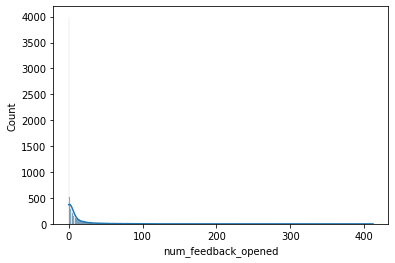

In [33]:
sns.histplot(data=res6, x = 'num_feedback_opened', kde=True) 
plt.show()

In [34]:
canton = res6.canton.value_counts(dropna=False)
df_canton = pd.DataFrame({"Canton": canton.index, "Count": canton.tolist(), "Count %": canton.tolist()/np.sum(canton.tolist()) })
df_canton

,Canton,Count,Count %
0,ZH,2086,0.256675
1,SG,1842,0.226652
2,NaN,1090,0.134121
3,AG,675,0.083056
4,SO,561,0.069029
5,BS,536,0.065953
6,BL,419,0.051557
7,BE,405,0.049834
8,SH,166,0.020426
9,AR,148,0.018211


[Text(0.5, 0, 'Canton'), Text(0, 0.5, 'Count')]

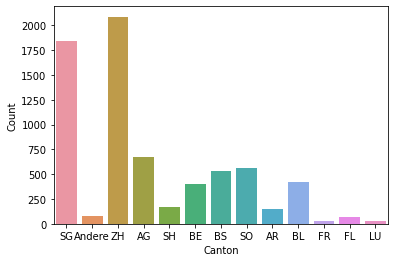

In [35]:
ax = sns.countplot(data=res6, x= 'canton')
ax.set(xlabel='Canton', ylabel='Count')

The number of times students opened the feedback window also follows the Poisson distribution, for the same reasons as num_events, num_questions and num_readings. Around 50% or more users give their feedback once or don't give any feedback. There is also no correlation between the student grades and their willingness of giving feedback.

For the cantons, we see that almost 40-50% of students are from St Gallen and Zürich. There is generally more students in those areas, so it should be expected. Almost all of the students come from Swiss German cantons, which is normal as the website is in german only, so students from Geneva for example may use another website/app.

e) Perform a multivariate analysis for two pairs of features of your choice. Please provide a metric and a visualization for both pairs. Please discuss: why did you choose these two pairs? What was your hypothesis? Do the results confirm your hypothesis?

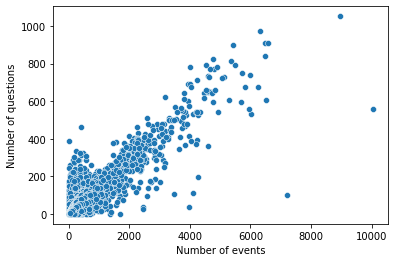

In [36]:
# Your code for multivariate analysis goes here
sns.scatterplot(data= res6, y = 'num_questions', x ='num_events')
plt.xlabel("Number of events")
plt.ylabel("Number of questions")
plt.show()

In [37]:
r, p = stats.pearsonr(res6['num_events'], res6['num_questions'])
print(r, p)

0.8993249452972287 0.0


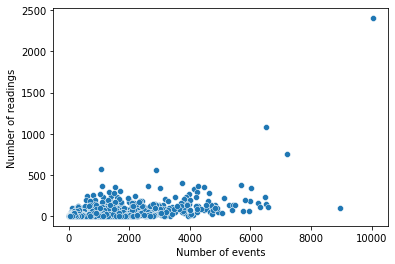

In [38]:
sns.scatterplot(data= res6, y = 'num_readings', x ='num_events')
plt.xlabel("Number of events")
plt.ylabel("Number of readings")
plt.show()

In [39]:
r, p = stats.pearsonr(res6['num_events'], res6['num_readings'])
print(r, p)

0.546884889541034 0.0


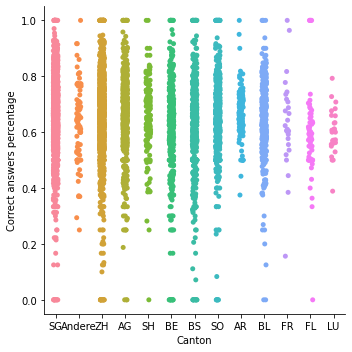

In [40]:
g = sns.catplot(data=res6, x='canton', y= 'percentage_correct')
g.set_axis_labels("Canton", "Correct answers percentage")

In [41]:
res6[['percentage_correct', 'canton']].groupby(by='canton').mean()

,percentage_correct
canton,
AG,0.655519
AR,0.667787
Andere,0.631586
BE,0.604271
BL,0.642598
BS,0.622374
FL,0.598165
FR,0.632513
LU,0.598068


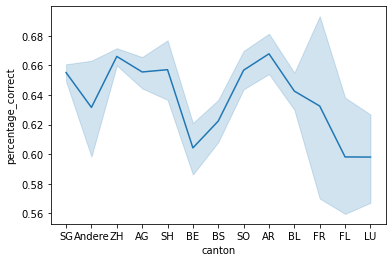

In [42]:
g = sns.lineplot(data=res6, x='canton', y= 'percentage_correct')

#### H1: Users who interact a lot with the website answer a lot of questions.
This hypothesis might seem obvious, since it is the main purpose of the website: for students to practice on topics by answering questions, but it is still interesting to see the dependency between the two values, and to see what the students actually use the website for, because it could be different than what we expect. We can see that the number of questions answered increases with the number of total events with the website, so we can conclude that those values are correlated. As a comparison, we can also see that even though users interact a lot with the website and answer the questions, they don't always read the theory pages, as the number does not increase with the number of events, which does not seem so obvious at first glance.

#### H2: Performance of students depends on their canton
It is interesting to see if the students perform better depending on where they come from, for example do students get better grades in german classes if they come from a Swiss German canton, and by how much. While the difference is not very big, we can observe that there are cantons where students perform better than others. We could think maybe it is because the cantons Bern and Lucern are on the border to Swiss Romandy cantons, so students focus less on german language than the rest, but we do not have enough examples from students in Swiss Romandy (we only have Friburg), so this reasoning might be unrelated. We could also think that the level of education is higher and better in those cantons than in the others, Zürich for example being a big hub for education.

# Task 3: Time-Series Analysis

In the last task, you will perform a time-series analysis.


#### a) Build a data frame containing one row per user per week:

``[user_id, week, num_events, num_questions, percentage_correct, num_reading]``


The features are defined as follows:

- **num_questions**: total number of questions the student answered **per week**(hint: action event = submit answer).

- **num_events**: total number of events of the student per week.

- **percentage_correct**: number of correct answers/total number of answers  **per week** (hint: evaluation = correct). If desired, you may assign a weight of 0.5 to partially correct answers.

- **num_reading**: total number of theory reading events **per week** (hint: action event = go to theory).

Where week 0 is the first week the specific user solved a task in the platform, i.e., the user's earliest entry in the transactions table.

Hint: You may extract the week of the year (dt.week) from the timestamps. 

You can limit the number of weeks to 13, i.e. for each user we just look at the first 13 weeks of data.
Yoy may change and justify your choice for the number of weeks.

In [43]:
# We only take users that we know are active, and have answered at least one question for the same reasons above
users_week = pd.merge(res6.user_id, pd.DataFrame({'week':list(range(0, 13))}), how="cross")
users_week

,user_id,week
0,387604,0
1,387604,1
2,387604,2
3,387604,3
4,387604,4
...,...,...
105646,404604,8
105647,404604,9
105648,404604,10
105649,404604,11


In [44]:
# Your code for building the dataframe goes here
transactions_copy = transactions[transactions['evaluation'].notna()].copy()

transactions_copy['date'] = pd.to_datetime(transactions_copy['commit_time'], unit='ms')

In [45]:
min_date = transactions_copy.groupby(by='user_id').date.min()
df_timeframe = pd.DataFrame({'user_id': min_date.index, 'min_date': min_date.tolist(), 'max_date': (min_date + pd.DateOffset(weeks=13)).tolist()})

In [46]:
transactions_time = pd.merge(transactions_copy, df_timeframe, on='user_id', how='left')

In [47]:
transactions_week = transactions_time[transactions_time['date'] < transactions_time['max_date']].copy()

In [48]:
transactions_week['week'] = (transactions_week['date'] - transactions_week['min_date']).apply(lambda x: int(pd.Timedelta(x).days / 7))

In [49]:
events_copy = events.copy()

events_copy['date'] = pd.to_datetime(events_copy['timestamp'], unit='ms')

In [50]:
events_time = pd.merge(events_copy, df_timeframe, on='user_id', how='inner')

In [51]:
events_week = events_time[(events_time['date'] < events_time['max_date']) & (events_time['date'] >= events_time['min_date'])].copy()
events_week['week'] = (events_week['date'] - events_week['min_date']).apply(lambda x: int(pd.Timedelta(x).days / 7))

In [52]:
nb_events_week = events_week.groupby(by=['user_id', 'week']).size()

df_nb_events_week = pd.DataFrame({'user_id': nb_events_week.index.get_level_values('user_id'), 
                                  'week': nb_events_week.index.get_level_values('week'), 
                                  'num_events': nb_events_week.tolist()})
res_week_1 = pd.merge(users_week, df_nb_events_week, on=['user_id', 'week'], how='left').fillna(value={'num_events':0})
res_week_1['num_events'] = res_week_1['num_events'].astype(np.int64)

In [53]:
questions_count_week = transactions_week.groupby(by=['user_id', 'week']).size()
df_questions_count_week = pd.DataFrame({'user_id'  : questions_count_week.index.get_level_values('user_id'), 
                                        'week'     : questions_count_week.index.get_level_values('week'), 
                                        'num_questions': questions_count_week.tolist()})

In [54]:
correct_count_week = transactions_week.loc[transactions_week['evaluation'] == 'CORRECT'].groupby(by=['user_id', 'week']).size()
partial_count_week = transactions_week.loc[transactions_week['evaluation'] == 'PARTIAL'].groupby(by=['user_id', 'week']).size() * 1/2
eval_count_week = correct_count_week.add(partial_count_week, fill_value=0)
df_eval_count_week = pd.DataFrame({'user_id': eval_count_week.index.get_level_values('user_id'), 
                                   'week': eval_count_week.index.get_level_values('week'), 
                                   'correct': eval_count_week.tolist()})

In [55]:
df_questions_correct_week = pd.merge(df_questions_count_week, df_eval_count_week, on=['user_id', 'week'], how='left').fillna(
    value={'correct':0})
df_questions_correct_week['percentage_correct'] = df_questions_correct_week['correct'] / df_questions_correct_week['num_questions']

In [56]:
res_week_2 = pd.merge(res_week_1, df_questions_correct_week[['user_id', 'week', 'num_questions', 'percentage_correct']], on=['user_id', 'week'], how='left').fillna(
    value={'num_questions':0})

In [57]:
readings_count_week = events_week.loc[events_week['action']=='GO_TO_THEORY'].groupby(by=['user_id', 'week']).size()
df_readings_count_week = pd.DataFrame({'user_id': readings_count_week.index.get_level_values('user_id'), 
                                       'week': readings_count_week.index.get_level_values('week'), 
                                       'num_readings': readings_count_week.tolist()})

In [58]:
res_week_3 = pd.merge(res_week_2, df_readings_count_week, on=['user_id', 'week'], how='left').fillna(
    value={'num_readings':0})
res_week_3

,user_id,week,num_events,num_questions,percentage_correct,num_readings
0,387604,0,179,1.0,0.000,59.0
1,387604,1,155,0.0,NaN,59.0
2,387604,2,159,0.0,NaN,33.0
3,387604,3,29,4.0,0.125,0.0
4,387604,4,23,2.0,0.750,0.0
...,...,...,...,...,...,...
105646,404604,8,0,0.0,NaN,0.0
105647,404604,9,0,0.0,NaN,0.0
105648,404604,10,0,0.0,NaN,0.0
105649,404604,11,0,0.0,NaN,0.0


#### b) Select two features and analyze their behavior over time. Please provide a hypothesis and visualization for both features. For ideas on how to perform a time series exploration, please check the lecture slides and notebook. Discuss your results: what do you observe? Do the results confirm your hypotheses?

### H1: The student performance is constant throughout the weeks

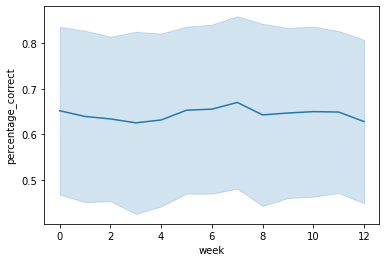

In [59]:
ax = sns.lineplot(data=res_week_3, x="week", y="percentage_correct", ci='sd')
plt.show()

The average of correct answers is indeed the same throughout the weeks. Students may perform better or worse for some weeks, but overall it remains around the global average we computed earlier.

### H2: Users become less active over time

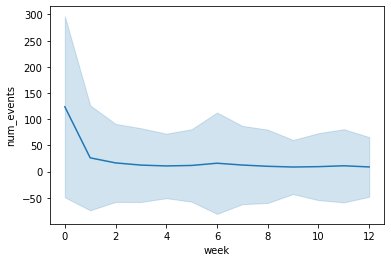

In [60]:
ax = sns.lineplot(data=res_week_3, x="week", y="num_events", ci='sd')
plt.show()

We can see that after the first week, the user activity is drops considerably. Maybe after using the website for one week, they are not motivated to keep working, or simply don't need to, they review a few topics they need practice in, and then move on. 

# Task 4: Creative extension 

Please provide **one** new hypothesis you would like to explore with the data and provide a visualization for it. Discuss your results: what do you observe? Do the results confirm your hypotheses?



### H: There is no difference between males and females in terms of the time taken to answer questions 

In [61]:
# Your creative visualization here
# Times questions answered or mcq take less time for students to answer
transactions_duration = transactions.loc[(transactions['evaluation'].notna()) & (transactions['commit_time'].notna())].copy()
transactions_duration['duration'] = pd.to_timedelta(transactions_duration['commit_time'] - transactions_duration['start_time'], unit='ms').dt.seconds / 60 
transactions_duration

,transaction_id,transaction_token,user_id,document_id,document_version,evaluation,input,start_time,commit_time,user_agent,validation,solution,type,duration
2,1011975,6f292166-86bd-4ec9-81e8-22e9033d571e,387604.0,111K3PY6sbr8ac1mRGpse1,87668,CORRECT,"{""type"": ""MULTIPLE_CHOICE"", ""selections"": {""0""...",1636444658255,1.636445e+12,NaN,PASS,"{""type"": ""MULTIPLE_CHOICE"", ""choices"": [{""cont...",MULTIPLE_CHOICE,0.083333
3,1020790,79a7d731-a36b-4529-a11b-108b9f877a04,387604.0,111K3PY6sbr8ac1mRGpse1,87668,CORRECT,"{""type"": ""MULTIPLE_CHOICE"", ""selections"": {""0""...",1636561847705,1.636562e+12,NaN,PASS,"{""type"": ""MULTIPLE_CHOICE"", ""choices"": [{""cont...",MULTIPLE_CHOICE,0.166667
4,1061970,a45b6464-371e-47f4-842c-34f9e345b4ec,387604.0,111K3PY6sbr8ac1mRGpse1,87668,CORRECT,"{""type"": ""MULTIPLE_CHOICE"", ""selections"": {""0""...",1637146373965,1.637146e+12,NaN,PASS,"{""type"": ""MULTIPLE_CHOICE"", ""choices"": [{""cont...",MULTIPLE_CHOICE,0.133333
5,1066627,813bd412-3041-48bd-98dc-6b56ac36f288,387604.0,111K3PY6sbr8ac1mRGpse1,87668,CORRECT,"{""type"": ""MULTIPLE_CHOICE"", ""selections"": {""0""...",1637233686711,1.637234e+12,NaN,PASS,"{""type"": ""MULTIPLE_CHOICE"", ""choices"": [{""cont...",MULTIPLE_CHOICE,0.066667
6,1219429,426596f6-a5e3-4efb-9c96-d08e7ab7cd8a,387604.0,111K3PY6sbr8ac1mRGpse1,87668,CORRECT,"{""type"": ""MULTIPLE_CHOICE"", ""selections"": {""0""...",1639410693460,1.639411e+12,NaN,PASS,"{""type"": ""MULTIPLE_CHOICE"", ""choices"": [{""cont...",MULTIPLE_CHOICE,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800002,1584091,c5659a66-9d7c-4c30-9de7-68d62d2c486b,404603.0,fBBfV7U4Z25vFGvcSh4DX,87419,PARTIAL,"{""type"": ""CLOZE_TEXT_DROPDOWN"", ""clozeInputs"":...",1645446877804,1.645447e+12,unknown,PASS,"{""gaps"": [""falsch"", ""falsch"", ""falsch"", ""richt...",CLOZE_TEXT_DROPDOWN,0.550000
800007,1584555,2cc6a524-43fc-480d-96d6-04b0a64e28e4,404604.0,47H79mEiY8x9CeHqi0D3Vn,89817,WRONG,"{""type"": ""CLOZE_MATH"", ""clozeInputs"": [""6"", ""4...",1645454988315,1.645455e+12,unknown,PASS,"{""type"": ""CLOZE_MATH""}",CLOZE_MATH,1.483333
800012,1585020,5735066d-7090-47b2-af61-41431f3b6f30,404604.0,4vjXRQDSr0d7CB5CrF3gSb,34233,PARTIAL,"{""type"": ""MULTIPLE_CHOICE"", ""selections"": {""0""...",1645461220858,1.645461e+12,unknown,PASS,"{""type"": ""MULTIPLE_CHOICE"", ""choices"": [{""cont...",MULTIPLE_CHOICE,1.150000
800016,1584578,7e328437-52df-4697-94e9-186844c3e269,404604.0,a1jzfZLIHDt7LzD8KKha54,39046,PARTIAL,"{""type"": ""MULTIPLE_CHOICE"", ""selections"": {""3""...",1645455097067,1.645455e+12,unknown,PASS,"{""type"": ""MULTIPLE_CHOICE"", ""choices"": [{""cont...",MULTIPLE_CHOICE,0.650000


In [62]:
users_duration = transactions_duration[['user_id', 'duration']].groupby(by='user_id').mean()
users_duration

,duration
user_id,
387604.0,0.971993
387605.0,2.931111
387608.0,1.079912
387615.0,11.509309
387643.0,13.163636
...,...
404597.0,0.883333
404598.0,1.083333
404599.0,1.316667


In [63]:
df_user_duration = pd.merge(users, users_duration, on='user_id', how='inner')
df_user_duration[['gender', 'duration']].groupby(by='gender').mean()

,duration
gender,
FEMALE,7.774849
MALE,9.395168
STAR,6.889259


In [64]:
df_user_duration.loc[df_user_duration['duration']<=10].gender.value_counts()

FEMALE    3358
MALE      2177
STAR       303
Name: gender, dtype: int64

In [65]:
df_user_duration.loc[df_user_duration['duration']>10].gender.value_counts()

FEMALE    560
MALE      440
STAR       52
Name: gender, dtype: int64

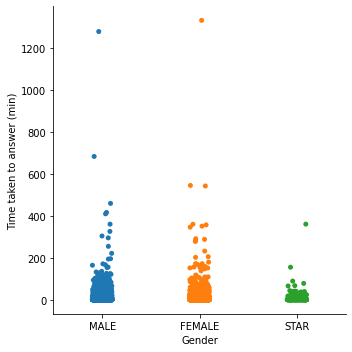

In [66]:
g = sns.catplot(data=df_user_duration, x='gender', y= 'duration')
g.set_axis_labels("Gender", "Time taken to answer (min)")

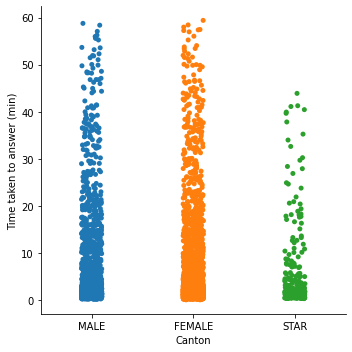

In [67]:
# Closer view of the distribution
g = sns.catplot(data=df_user_duration.loc[df_user_duration['duration']<=60], x='gender', y= 'duration')
g.set_axis_labels("Canton", "Time taken to answer (min)")

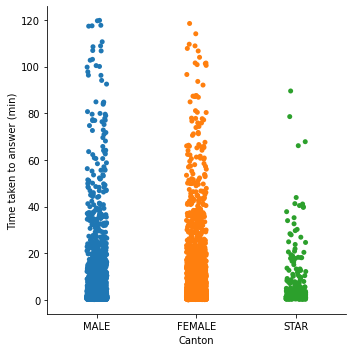

In [68]:
g = sns.catplot(data=df_user_duration.loc[df_user_duration['duration']<=120], x='gender', y= 'duration')
g.set_axis_labels("Canton", "Time taken to answer (min)")

We can see that the hypothesis is actually not true, the average time is lower for female students than male students. This is because the female population is bigger, so there are a lot more short transactions for female students than for male students, while the number of transactions longer than ten minutes is the same for both genders. There are surprisingly outliers with 10 or more hours taken to answer a question, maybe they forgot to submit it, or the question was very hard.

The average time for gender neutral students is even lower because the majority of the students take less than one hour to answer, and the distribution does not have outliers as far as female or male.